<a href="https://colab.research.google.com/github/437-maral/Deap-Learning-/blob/main/ODEs_Nueral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.typing import ArrayLike
from scipy.integrate import solve_ivp

In [2]:
n_states = 2
n_steps = 501  # for plotting

# Define time interval of integration
t0 = 0.0
te = 15.0
tspan = (t0, te)
t_traj = np.linspace(t0, te, n_steps)

# Initial condition
u0 = np.array([1.0, 1.0])

# Define dynamics
def f_true(
    _t: float,
    u: ArrayLike,
) -> ArrayLike:
    return np.array([1.5 * u[0] - 1.0 * u[0] * u[1], 3.0 * u[0] * u[1] - 1.0 * u[1]])

In [3]:
sol = solve_ivp(f_true, (t0, te), u0, t_eval=t_traj)

In [4]:
sol

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  3.000e-02 ...  1.497e+01  1.500e+01]
        y: [[ 1.000e+00  1.014e+00 ...  6.362e-02  6.496e-02]
            [ 1.000e+00  1.063e+00 ...  8.118e-01  7.924e-01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 182
     njev: 0
      nlu: 0

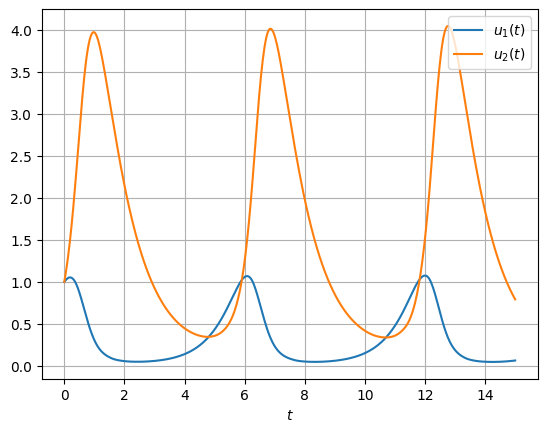

In [5]:
fig, ax = plt.subplots()
u_traj = sol.y

# Plot trajectory that generated data
ax.plot(t_traj, u_traj[0, :], label="$u_1(t)$")
ax.plot(t_traj, u_traj[1, :], label="$u_2(t)$")

ax.legend(loc="best")
ax.set_xlabel("$t$")
ax.grid()

In [6]:
from abc import ABC, abstractmethod  # abstract base classes


class ODESolver(ABC):
    @abstractmethod
    def step(self, f, t, u):
        """Apply a single integration step.
        Takes in f, tₖ and uₖ and returns tₖ₊₁, uₖ₊₁.
        """
        pass

    def __call__(self, f, tspan, u0):
        "Solve initial value problem, similar to SciPy's solve_ivp."
        t0, te = tspan
        t = t0
        u = u0

        ts = [t]
        us = [u]
        while t < te:
            t, u = self.step(f, t, u)
            us.append(u)
            ts.append(t)

        us = np.stack(us, axis=-1)
        return us, ts

In [8]:
class EulerSolver(ODESolver):
    def __init__(self, dt):
        super().__init__()
        self.dt = dt

    def step(self, f, t, u):
        t_next=t+self.dt
        f=f_true(t,u)
        u_next=u+self.dt*f
        return t_next, u_next

In [9]:
euler = EulerSolver(0.1)
u_euler, t_euler = euler(f_true, tspan, u0)
u_euler

array([[1.00000000e+00, 1.05000000e+00, 1.08150000e+00, 1.08604230e+00,
        1.05506315e+00, 9.82434736e-01, 8.68255635e-01, 7.22335044e-01,
        5.64069061e-01, 4.16182659e-01, 2.95194583e-01, 2.06145355e-01,
        1.45024277e-01, 1.04496023e-01, 7.78289366e-02, 6.01322028e-02,
        4.81987743e-02, 4.00100982e-02, 3.43074579e-02, 3.03007492e-02,
        2.74871643e-02, 2.55416951e-02, 2.42513236e-02, 2.34751681e-02,
        2.31200274e-02, 2.31251498e-02, 2.34526143e-02, 2.40811934e-02,
        2.50024215e-02, 2.62180966e-02, 2.77387372e-02, 2.95826994e-02,
        3.17757657e-02, 3.43510888e-02, 3.73494159e-02, 4.08195500e-02,
        4.48190215e-02, 4.94149587e-02, 5.46851548e-02, 6.07193356e-02,
        6.76206379e-02, 7.55073121e-02, 8.45146645e-02, 9.47972588e-02,
        1.06531393e-01, 1.19917872e-01, 1.35185081e-01, 1.52592369e-01,
        1.72433735e-01, 1.95041774e-01, 2.20791815e-01, 2.50106128e-01,
        2.83457975e-01, 3.21375151e-01, 3.64442434e-01, 4.133020

In [10]:
class RungeKuttaSolver(ODESolver):
    def __init__(self, dt):
        super().__init__()
        self.dt = dt

    def step(self, f, t, u):
        t_next=t+self.dt
        k1=f_true(t,u)
        k2=f_true(t+float(self.dt/2),u+float(self.dt/2)*k1)
        k3=f_true(t+self.dt/2,u+self.dt/2*k2)
        k4=f_true(t+self.dt,u+self.dt*k3)
        k_t=k1+2*k2+2*k3+k4
        u_next=u+self.dt/6*k_t
        return t_next,u_next

In [11]:
rk = RungeKuttaSolver(0.1)
u_rk, t_rk = rk(f_true, tspan, u0)

u_rk

array([[1.        , 1.03980898, 1.0533215 , 1.03247374, 0.9729192 ,
        0.87736197, 0.75667975, 0.62692118, 0.50351596, 0.39661594,
        0.31003662, 0.24297911, 0.19240756, 0.15477759, 0.12690464,
        0.10624433, 0.09088345, 0.07942855, 0.07088052, 0.06452773,
        0.05986422, 0.05653036, 0.05427099, 0.05290613, 0.05231084,
        0.05240111, 0.05312429, 0.05445247, 0.05637794, 0.05891025,
        0.06207439, 0.06590968, 0.07046939, 0.0758208 , 0.0820457 ,
        0.08924112, 0.09752047, 0.10701481, 0.11787433, 0.13026999,
        0.14439517, 0.16046729, 0.17872927, 0.1994505 , 0.22292713,
        0.24948111, 0.27945733, 0.31321781, 0.3511315 , 0.3935575 ,
        0.44081854, 0.49316011, 0.55068896, 0.61328172, 0.68045187,
        0.7511611 , 0.8235619 , 0.89467044, 0.96000492, 1.01330873,
        1.0466304 , 1.05121747, 1.0196935 , 0.94939746, 0.84537633,
        0.72044096, 0.59107844, 0.47156791, 0.37023182, 0.28935119,
        0.22727419, 0.18068759, 0.14609213, 0.12

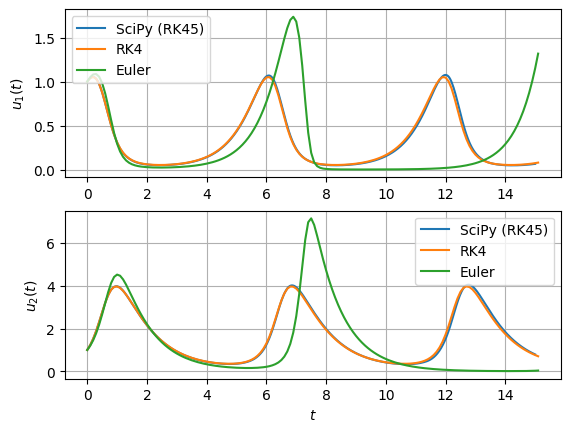

In [12]:
fig, axs = plt.subplots(2, 1)

for i in range(n_states):
    # Plot true trajectory
    axs[i].plot(t_traj, u_traj[i, :], label="SciPy (RK45)")
    # Plot solvers
    axs[i].plot(t_rk, u_rk[i, :], label=r"RK4")
    axs[i].plot(t_euler, u_euler[i, :], label=r"Euler")

    axs[i].set_ylabel(f"$u_{i+1}(t)$")
    axs[i].legend(loc="best")
    axs[i].grid()

axs[n_states - 1].set_xlabel("$t$");

In [13]:
te = 3.0
n_data = 31
t_data = np.linspace(t0, te, n_data)

sol_data = solve_ivp(f_true, (t0, te), u0, t_eval=t_data)
u_data = sol_data.y

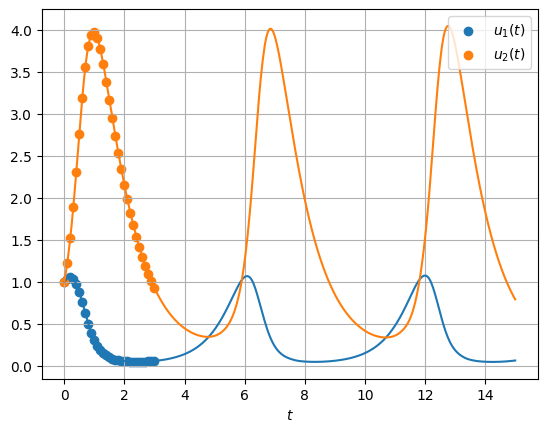

In [14]:
fig, ax = plt.subplots()

# Plot trajectory that generated data
ax.plot(t_traj, u_traj[0, :], c="C0")
ax.plot(t_traj, u_traj[1, :], c="C1")

# Plot data
ax.scatter(t_data, u_data[0, :], c="C0", label="$u_1(t)$")
ax.scatter(t_data, u_data[1, :], c="C1", label="$u_2(t)$")

ax.legend(loc="best")
ax.set_xlabel("$t$")
ax.grid()

In [15]:
pip install torchdiffeq

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchdiffeq import odeint_adjoint as odeint

# Fix random seed
torch.manual_seed(123)

# Automatically use GPU if CUDA is available
device = torch.device("cuda:" + str(0) if torch.cuda.is_available() else "cpu")

In [18]:

###converting dataset to torch

u0_torch = torch.tensor([1.0, 1.0]).to(device)
t_torch = torch.tensor(t_data).to(device)
u_target = torch.tensor(u_data.transpose()).to(device)

In [19]:
class MyNeuralODE(nn.Module):
    def __init__(self, net):
        super().__init__()
        self.net = net  # neural network

    def forward(self, _t, u):
        return self.net(u)

In [20]:
net = nn.Sequential(
    nn.Linear(2, 16),  # input dimensionality of u
    nn.Tanh(),
    nn.Linear(16, 2),  # output dimensionality of u
)

for layer in net.modules():
    if isinstance(layer, nn.Linear):
        nn.init.normal_(layer.weight, mean=0.0, std=0.05)#bias and weights are really , for big weight , it goes to infinity
        nn.init.constant_(layer.bias, val=0.0)

# Define Neural ODE
neural_ode = MyNeuralODE(net).to(device)

In [21]:
u_pred = odeint(neural_ode, u0_torch, t_torch).to(device)
u_pred.size()

torch.Size([31, 2])

In [22]:
def pred_to_numpy(u):
    return u.detach().cpu().numpy().transpose()


def visualize_prediction_2d(neural_ode):
    u_pred = pred_to_numpy(odeint(neural_ode, u0_torch, t_torch))

    # Compute full neural ODE trajectory
    t_full = torch.linspace(t0, te, 501).to(device)
    u_full = pred_to_numpy(odeint(neural_ode, u0_torch, t_full))

    fig, axs = plt.subplots(2, 1)

    for i in range(n_states):
        # Plot data
        axs[i].scatter(t_data, u_data[i, :], c="C0", label="Data")
        # Plot neural ODE prediction
        axs[i].scatter(t_data, u_pred[i, :], c="C1", label="Prediction")
        # Plot full neural ODE trajectory
        axs[i].plot(t_full, u_full[i, :], c="C1")

        axs[i].set_ylabel(f"$u_{i+1}(t)$")
        axs[i].legend(loc="best")
        axs[i].grid()

    axs[n_states - 1].set_xlabel("$t$")


def visualize_prediction_3d(neural_ode):
    u_pred = pred_to_numpy(odeint(neural_ode, u0_torch, t_torch))

    # Compute full neural ODE trajectory
    t_full = torch.linspace(t0, te, 501).to(device)
    u_full = pred_to_numpy(odeint(neural_ode, u0_torch, t_full))

    ax = plt.figure().add_subplot(projection="3d")

    # Plot data
    ax.scatter(u_data[0, :], u_data[1, :], t_data, c="C0", label="Data")
    # Plot neural ODE prediction
    ax.scatter(u_pred[0, :], u_pred[1, :], t_data, c="C1", label="Prediction")
    # Plot full neural ODE trajectory
    ax.plot(u_full[0, :], u_full[1, :], t_full, c="C1")

    ax.legend(loc="best")
    ax.set_xlabel("$u_1$")
    ax.set_ylabel("$u_2$")
    ax.set_zlabel("$t$")
    ax.grid()

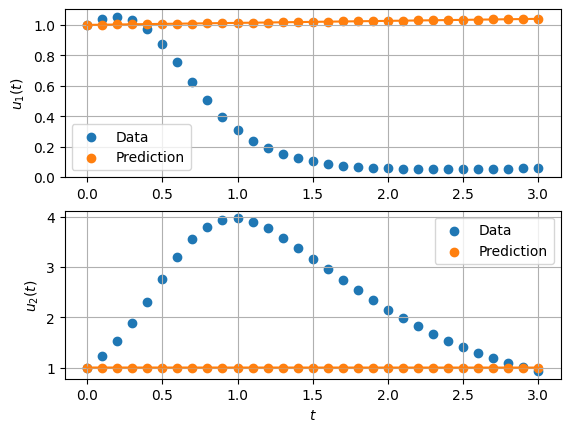

In [23]:
visualize_prediction_2d(neural_ode)

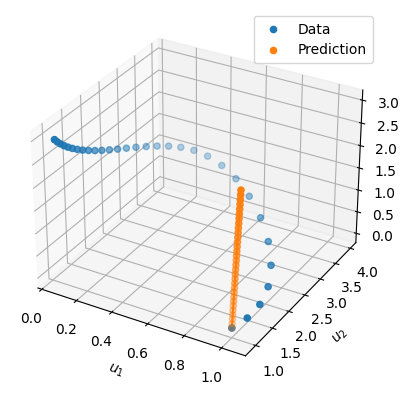

In [24]:
visualize_prediction_3d(neural_ode)

In [28]:
def loss_fn(u, u_pred):
    loss=torch.sum(torch.norm(u-u_pred,dim=1))
    return loss

In [29]:
loss_fn(u_target, u_pred)

tensor(52.0744, dtype=torch.float64, grad_fn=<SumBackward0>)

In [ ]:
torch.manual_seed(123)  # Fix random seed

optimizer = optim.Adam(neural_ode.parameters(), lr=2e-3)

n_iters = 1000
print_every = 50

for i in range(1, n_iters + 1):
    optimizer.zero_grad()

    ## INSERT YOUR SOLUTION HERE
    u_pred = odeint(neural_ode, u0_torch, t_torch).to(device)
    loss =loss_fn(u_target, u_pred)
    loss.backward()
    optimizer.step()



    if i == 1 or i % print_every == 0:
        print(f"Step: {i :4d} | Loss: {loss.item() :.6f}")
        # visualize_prediction_2d(neural_ode)

Step:    1 | Loss: 52.074367
Step:   50 | Loss: 37.470819
Step:  100 | Loss: 36.099064
Step:  150 | Loss: 33.332168
